<a href="https://colab.research.google.com/github/ditorizkyka/Final-Project/blob/main/TA_YOLOv10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pothole Detection using YOLOv10



In [ ]:
!nvidia-smi

!pip install ultralytics wandb


Sun Oct 12 14:19:15 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   55C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Data Collection & Split

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="0g1oLVsmKRymF1NXsqeU")
project = rf.workspace("arthana-dbw2b").project("pothole-detection-th8es")
version = project.version(9)
dataset = version.download("yolov9")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.8/89.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 55.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Pothole-detection-9 in yolov9:: 100%|██████████| 8474/8474 [00:03<00:00, 2560.09it/s]


#

In [ ]:
import os

for split in ["train","valid","test"]:
    print(split, len(os.listdir(f"Pothole-detection-9/{split}/images")))

train 3028
valid 670
test 533


In [ ]:
os.listdir(f"Pothole-detection-9/train/images")

Found existing installation: ultralytics 8.3.205
Uninstalling ultralytics-8.3.205:
  Successfully uninstalled ultralytics-8.3.205
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.8/750.8 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 12.8 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.2.0
    Uninstalling ultralytics-8.2.0:
      Successfully uninstalled ultralytics-8.2.0


In [ ]:
!cat Pothole-detection-9/data.yaml

names:
- Pothole-
nc: 1
roboflow:
  license: CC BY 4.0
  project: pothole-detection-th8es
  url: https://universe.roboflow.com/arthana-dbw2b/pothole-detection-th8es/dataset/9
  version: 9
  workspace: arthana-dbw2b
test: ../test/images
train: ../train/images
val: ../valid/images


# Data Training

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov10s.pt")

# train
model.train(
    data="Pothole-detection-9/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    project="pothole_exp",
    name="yolov10_poc"
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.212 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Pothole-detection-9/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7df4a1eee0f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# Testing

In [ ]:
# --- 🧪 TESTING & EVALUASI MODEL BASELINE (FIXED) ---
from ultralytics import YOLO
import time, glob, pandas as pd

# 1️⃣ Load model terbaik
model = YOLO("pothole_exp/yolov10_poc/weights/best.pt")

# 2️⃣ Hitung waktu inferensi total di test set
test_images = glob.glob("Pothole-detection-9/test/images/*")
start_time = time.time()
results_test = model.val(data="Pothole-detection-9/data.yaml", split="test")
total_time = time.time() - start_time
inference_time = total_time / len(test_images) if len(test_images) > 0 else 0

# 3️⃣ Ambil metrik evaluasi utama
metrics = results_test.results_dict
precision = metrics.get("metrics/precision(B)", 0)
recall = metrics.get("metrics/recall(B)", 0)
map50 = metrics.get("metrics/mAP50(B)", 0)
map5095 = metrics.get("metrics/mAP50-95(B)", 0)

print("\n📊 HASIL EVALUASI BASELINE (TEST SET):")
print(f"Precision     : {precision:.4f}")
print(f"Recall        : {recall:.4f}")
print(f"mAP@0.5       : {map50:.4f}")
print(f"mAP@0.5:0.95  : {map5095:.4f}")
print(f"Inference Time: {inference_time:.4f} detik/gambar")

# 4️⃣ Simpan hasil metrik ke CSV
pd.DataFrame([{
    "Precision": precision,
    "Recall": recall,
    "mAP@0.5": map50,
    "mAP@0.5:0.95": map5095,
    "Inference Time (s/img)": inference_time
}]).to_csv("baseline_metrics.csv", index=False)

print("\n✅ Hasil evaluasi baseline berhasil disimpan ke 'baseline_metrics.csv'")


Ultralytics 8.3.212 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10s summary (fused): 106 layers, 7,218,387 parameters, 0 gradients, 21.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 53.6±98.5 MB/s, size: 50.3 KB)
val: Scanning /content/Pothole-detection-9/test/labels... 533 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 533/533 622.7it/s 0.9s
val: New cache created: /content/Pothole-detection-9/test/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 12, len(boxes) = 641. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 34/34 4.1it/s 8.2s
                   all        533        641      0.794      0.626      0.701      0.323
Speed: 0.8ms preprocess, 10.0ms inference, 0.0ms loss, 0

# Metrics Evaluation and Visualization

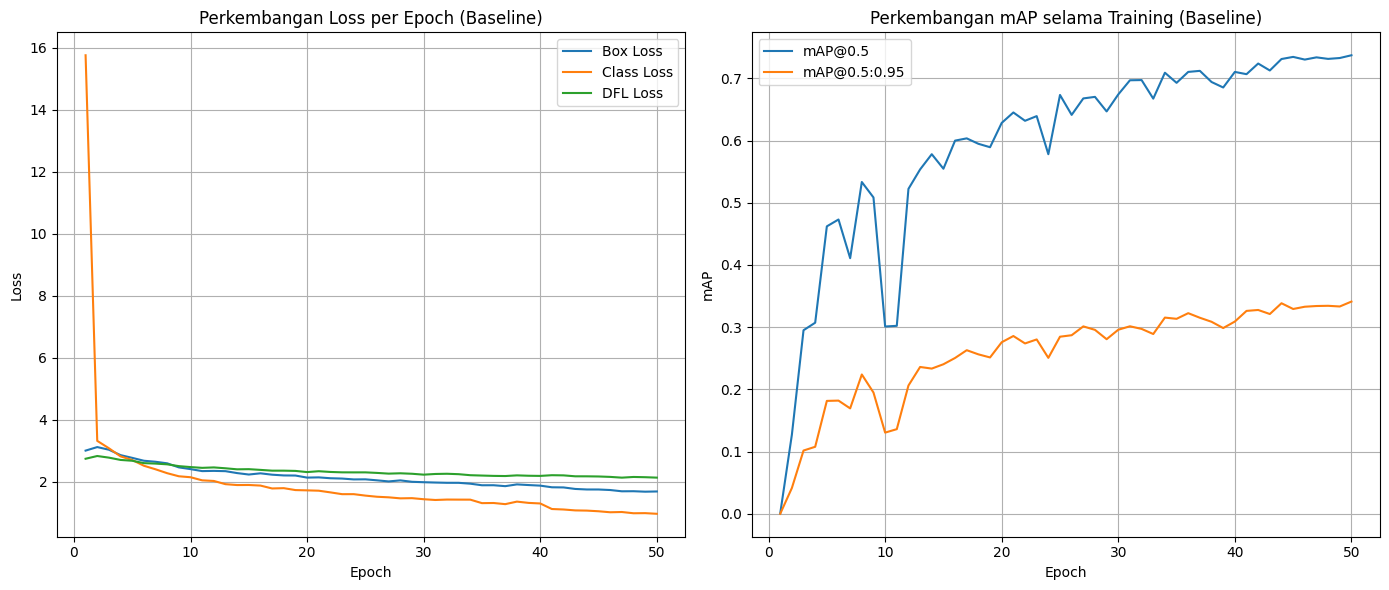

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

# --- 📉 VISUALISASI HASIL TRAINING BASELINE ---
results_path = "pothole_exp/yolov10_poc/results.csv"

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(df["epoch"], df["train/box_loss"], label="Box Loss")
plt.plot(df["epoch"], df["train/cls_loss"], label="Class Loss")
plt.plot(df["epoch"], df["train/dfl_loss"], label="DFL Loss")
plt.title("Perkembangan Loss per Epoch (Baseline)")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend(); plt.grid()

plt.subplot(1,2,2)
plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP@0.5")
plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP@0.5:0.95")
plt.title("Perkembangan mAP selama Training (Baseline)")
plt.xlabel("Epoch"); plt.ylabel("mAP"); plt.legend(); plt.grid()

plt.tight_layout()
plt.show()


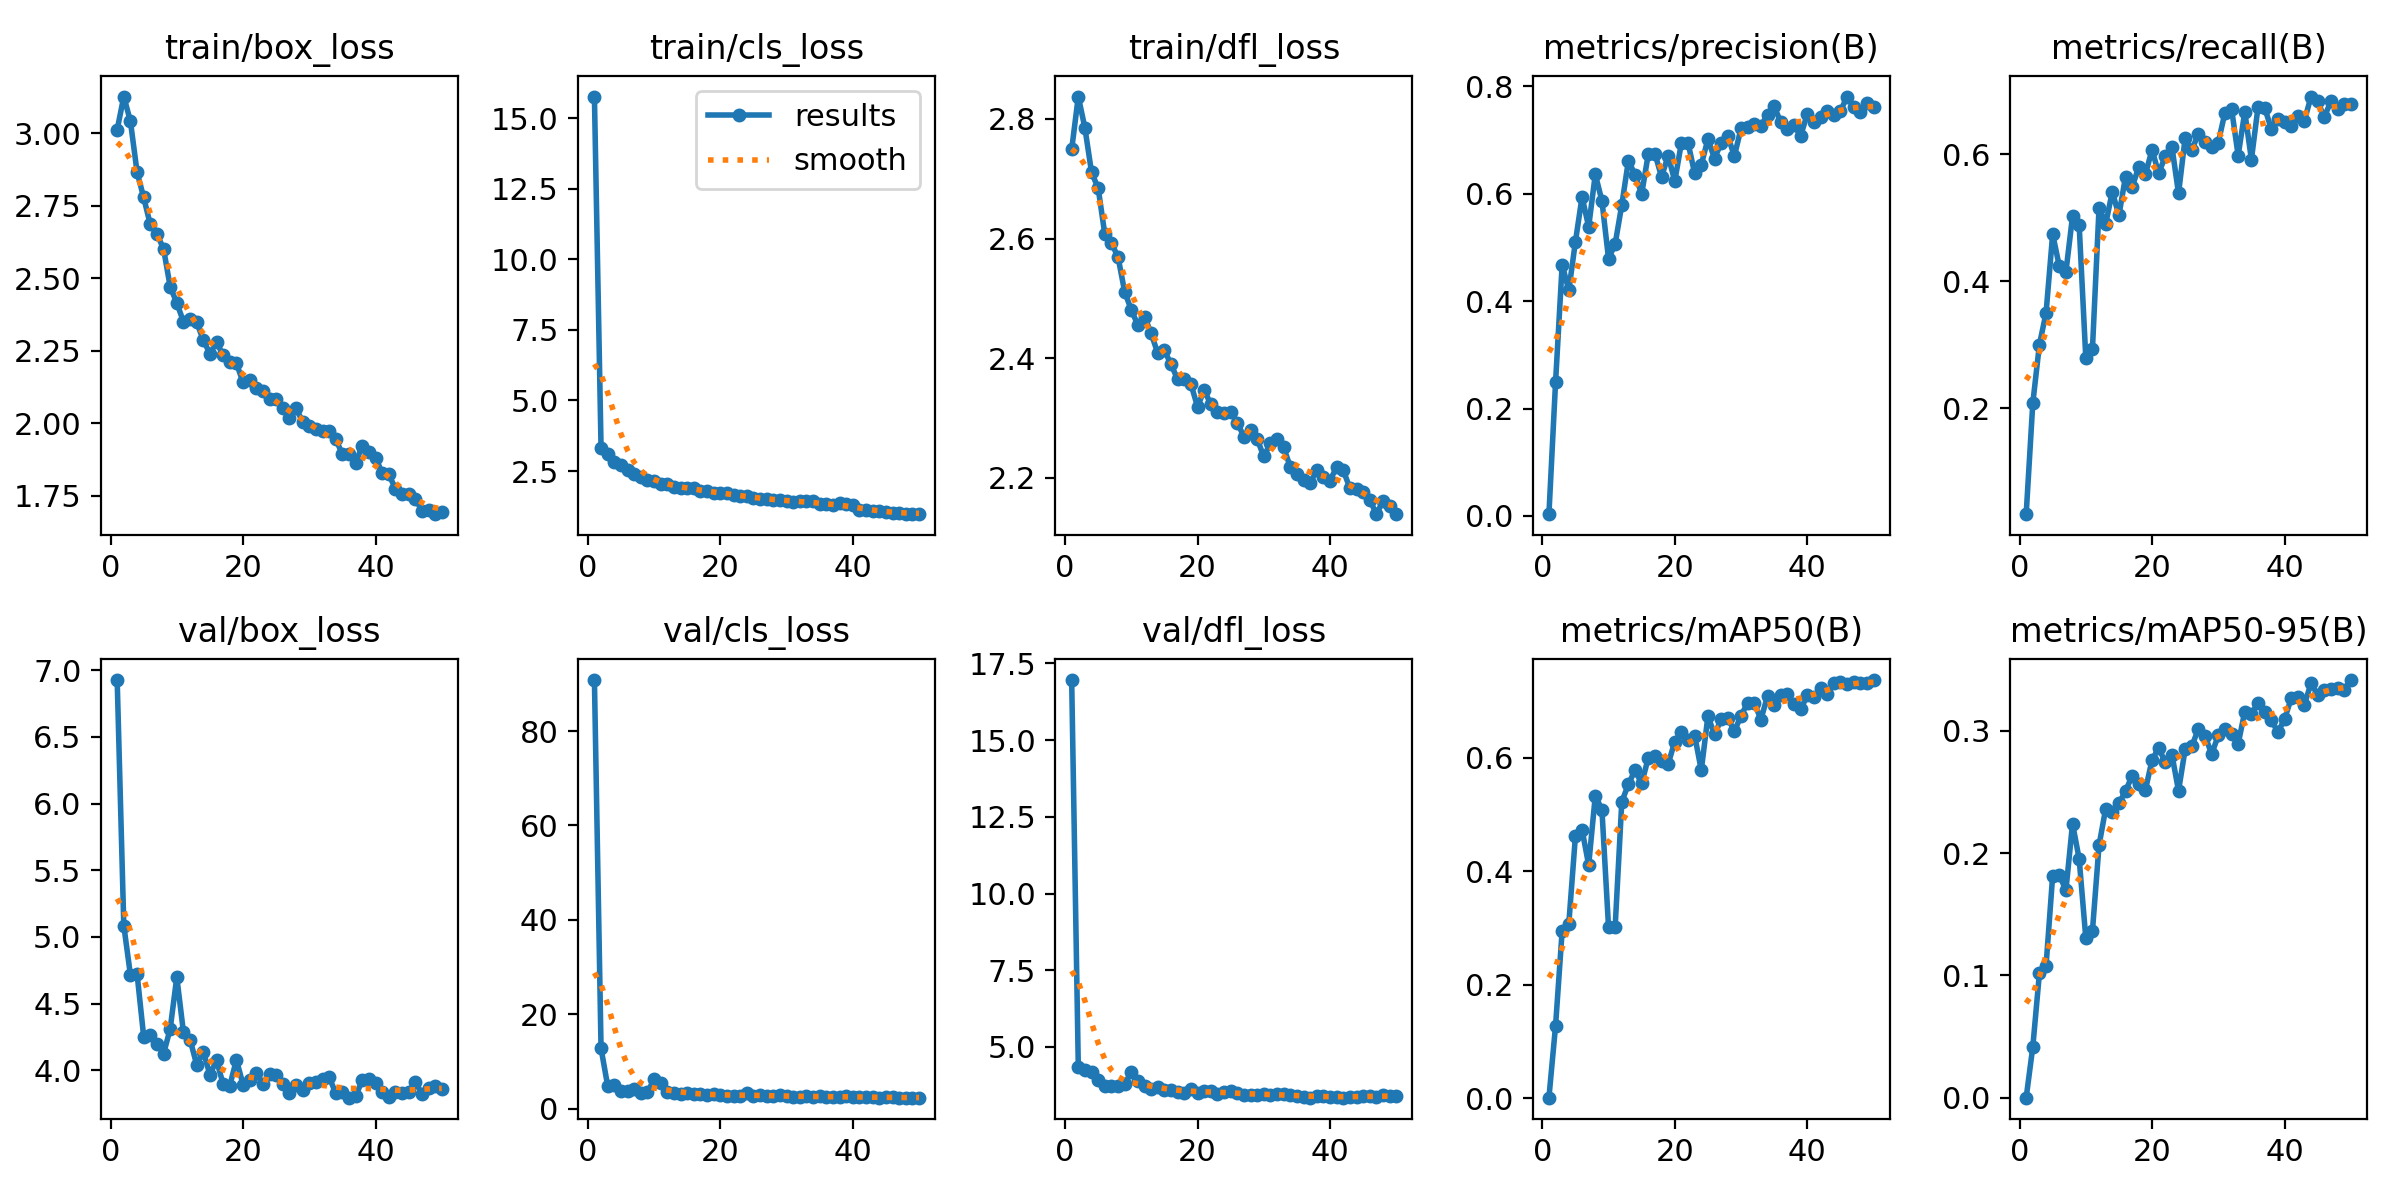

In [ ]:
from IPython.display import Image
Image(filename="pothole_exp/yolov10_poc/results.png")


In [ ]:
from ultralytics import YOLO
import os, cv2, random, time
import pandas as pd
import matplotlib.pyplot as plt


image 1/533 /content/Pothole-detection-9/test/images/20240220_062158_mp4-0001_jpg.rf.25a333b82f7b18d7d42953d2d9e04b80.jpg: 640x640 2 Pothole-s, 15.0ms
image 2/533 /content/Pothole-detection-9/test/images/20240220_062158_mp4-0003_jpg.rf.6948adc40197af0e4ae03d10aad4b992.jpg: 640x640 2 Pothole-s, 14.9ms
image 3/533 /content/Pothole-detection-9/test/images/20240220_062158_mp4-0004_jpg.rf.d57477de1c6b8150d72d22531e689c17.jpg: 640x640 1 Pothole-, 14.9ms
image 4/533 /content/Pothole-detection-9/test/images/20240220_062158_mp4-0005_jpg.rf.adaad5c209173bf0ca57d27f25b7ef85.jpg: 640x640 2 Pothole-s, 14.8ms
image 5/533 /content/Pothole-detection-9/test/images/20240220_062158_mp4-0006_jpg.rf.9e269f329a3bc09957f528ec436e7167.jpg: 640x640 2 Pothole-s, 14.9ms
image 6/533 /content/Pothole-detection-9/test/images/20240220_062158_mp4-0007_jpg.rf.4c587034d5fe1c7af667ca7e059715bb.jpg: 640x640 1 Pothole-, 14.8ms
image 7/533 /content/Pothole-detection-9/test/images/20240220_062158_mp4-0009_jpg.rf.78c04bed56

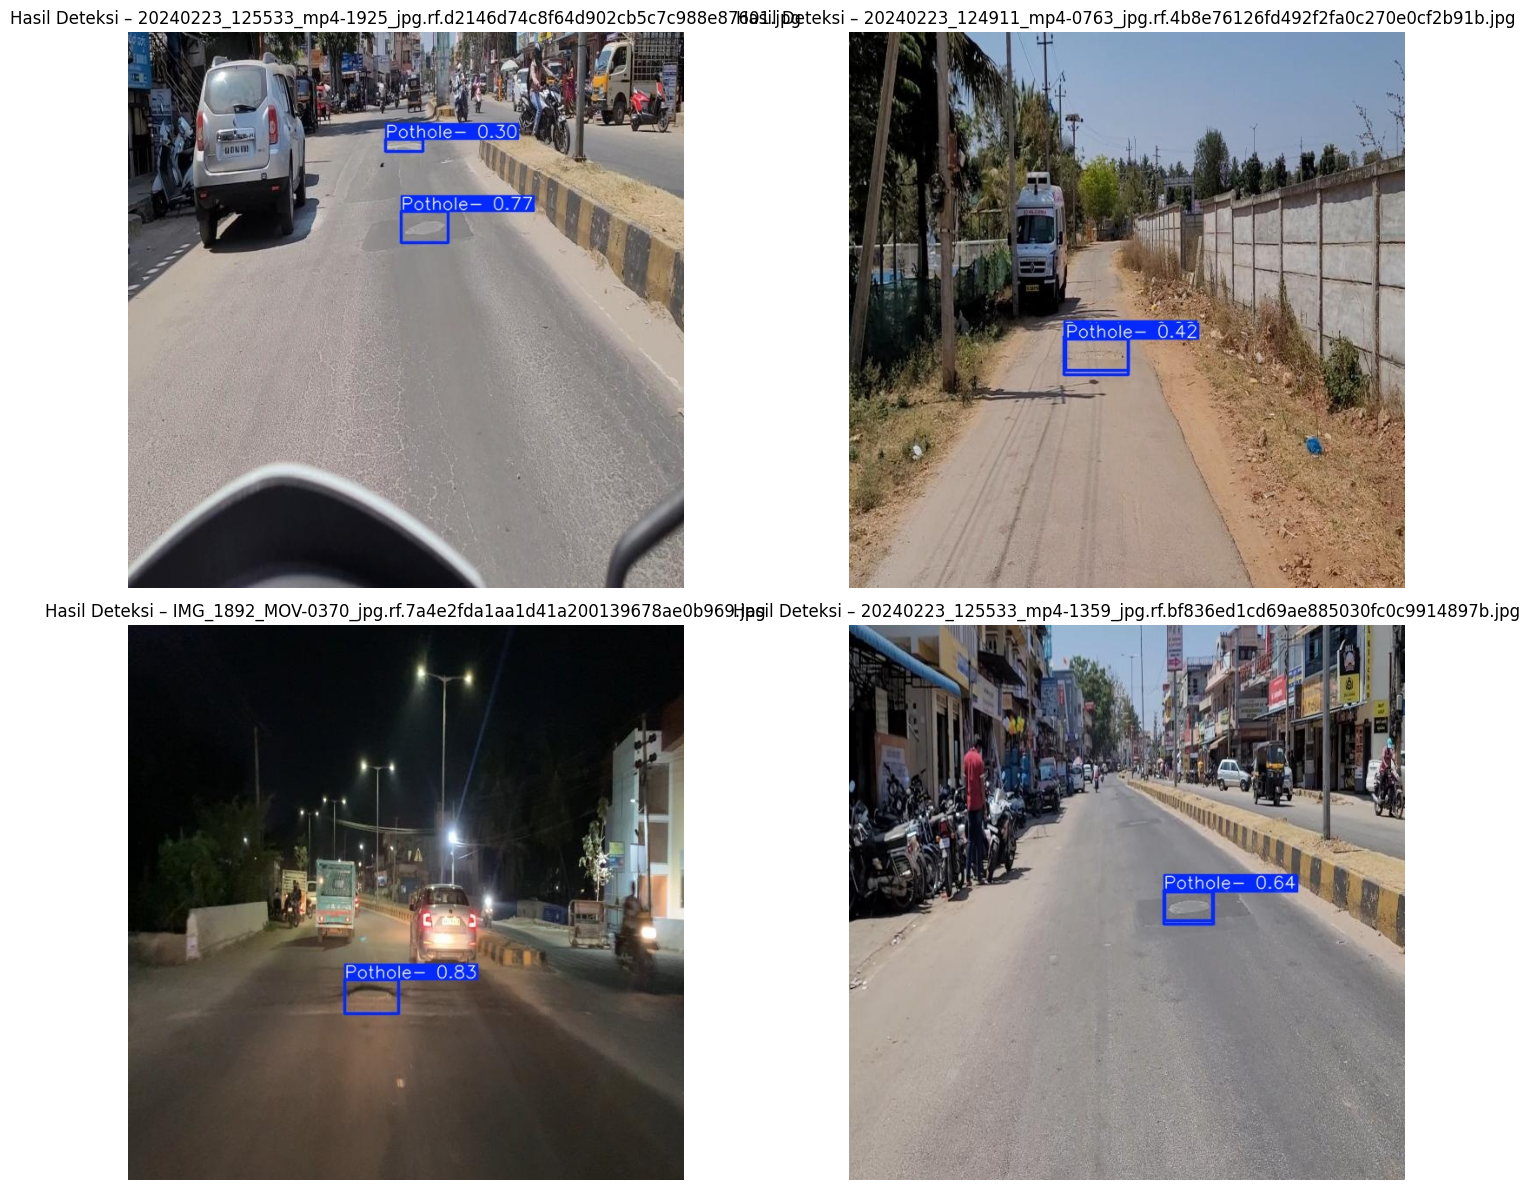

In [ ]:

# --- 🖼️ VISUALISASI HASIL DETEKSI BASELINE ---
pred_results = model.predict(
    source="Pothole-detection-9/test/images",
    conf=0.25,
    save=True,
    project="pothole_exp",
    name="yolov10s_baseline_test"
)

output_dir = "pothole_exp/yolov10s_baseline_test"

fixed_images = [
    "20240223_125533_mp4-1925_jpg.rf.d2146d74c8f64d902cb5c7c988e87601.jpg",
"20240223_124911_mp4-0763_jpg.rf.4b8e76126fd492f2fa0c270e0cf2b91b.jpg",
"IMG_1892_MOV-0370_jpg.rf.7a4e2fda1aa1d41a200139678ae0b969.jpg",
"20240223_125533_mp4-1359_jpg.rf.bf836ed1cd69ae885030fc0c9914897b.jpg",
]

## Pastikan file-file tersebut ada di folder hasil prediksi
available_images = [f for f in fixed_images if os.path.exists(os.path.join(output_dir, f))]

if not available_images:
    print("⚠️ Gambar yang dipilih tidak ditemukan di folder hasil prediksi.")
else:
    plt.figure(figsize=(16, 12))
    for i, img_file in enumerate(available_images):
        img_path = os.path.join(output_dir, img_file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(2, 2, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Hasil Deteksi – {img_file}")
    plt.tight_layout()
    plt.show()

# Save Model

In [ ]:
from ultralytics import YOLO

# Load model hasil training terbaik
model = YOLO("pothole_exp/yolov10_poc/weights/best.pt")

# Export ke format ONNX
model.export(format="onnx")


Ultralytics 8.3.212 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
YOLOv10s summary (fused): 106 layers, 7,218,387 parameters, 0 gradients, 21.4 GFLOPs

PyTorch: starting from 'pothole_exp/yolov10_poc/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 300, 6) (15.8 MB)

ONNX: starting export with onnx 1.19.1 opset 22...
ONNX: slimming with onnxslim 0.1.71...
ONNX: export success ✅ 1.5s, saved as 'pothole_exp/yolov10_poc/weights/best.onnx' (27.8 MB)

Export complete (2.5s)
Results saved to /content/pothole_exp/yolov10_poc/weights
Predict:         yolo predict task=detect model=pothole_exp/yolov10_poc/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=pothole_exp/yolov10_poc/weights/best.onnx imgsz=640 data=Pothole-detection-9/data.yaml  
Visualize:       https://netron.app


'pothole_exp/yolov10_poc/weights/best.onnx'

In [ ]:
!pip install onnx onnx2tf tensorflow==2.18.0


In [ ]:
import onnx
from onnx2keras import onnx_to_keras
from tensorflow.keras.models import save_model

# 1️⃣ Load file ONNX
onnx_model = onnx.load("best.onnx")

# 2️⃣ Konversi ke model Keras
# node_names menentukan input dari model ONNX (biasanya ['images'])
keras_model = onnx_to_keras(onnx_model, ['images'], name_policy='renumerate')

# 3️⃣ Simpan dalam format .h5
keras_model.save("best_yolov11.h5")
print("✅ Model berhasil disimpan sebagai best_yolov11.h5")


ModuleNotFoundError: No module named 'onnx2keras'

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model("best_tf_model")
model.save("best_yolov11.h5")
print("✅ Model berhasil disimpan sebagai best_yolov11.h5")


ValueError: File format not supported: filepath=best_tf_model. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(best_tf_model, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).